In [1]:
# venv environment library downloads

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read the dataset

df = pd.read_csv('./NYPD_Arrest_Data__Year_to_Date_.csv')

In [4]:
# Inspect the Dataset

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [5]:
# Check for missing values

df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [6]:
# Drop rows with missing values

df.dropna(inplace=True)

In [7]:
# Convert arrest date and time columns to datetime objects

df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [8]:
# Extract month, day, hour, weekday, and season from arrest date and time columns

df["MONTH"] = df["ARREST_DATE"].dt.month
df["DAY"] = df["ARREST_DATE"].dt.day
df["WEEKDAY"] = df["ARREST_DATE"].dt.day_name()
df["SEASON"] = df["ARREST_DATE"].dt.month.apply(lambda x: "Winter" if x in [12, 1, 2] else "Spring" if x in [3, 4, 5] else "Summer" if x in [6, 7, 8] else "Fall")

'''
Explanation of the if else statement above:
if x in [12, 1, 2] then "Winter"
else if x in [3, 4, 5] then "Spring"
else if x in [6, 7, 8] then "Summer"
else "Fall"
'''

'\nExplanation of the if else statement above:\nif x in [12, 1, 2] then "Winter"\nelse if x in [3, 4, 5] then "Spring"\nelse if x in [6, 7, 8] then "Summer"\nelse "Fall"\n'

In [9]:
# Display the first 5 rows of the dataset

df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MONTH,DAY,WEEKDAY,SEASON
0,261209118,2023-01-01,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,...,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426),1,1,Sunday,Winter
1,262984267,2023-02-03,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,...,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923),2,3,Friday,Winter
2,263664549,2023-02-15,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,...,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468),2,15,Wednesday,Winter
3,261345231,2023-01-04,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797),1,4,Wednesday,Winter
4,263536618,2023-02-13,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,...,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175),2,13,Monday,Winter


In [10]:
# Map arrest key code to offense description using a lookup table

lookup = pd.read_csv("./NYPD_Arrest_Data__Year_to_Date_.csv")
df = df.merge(lookup, on="ARREST_KEY", how="left")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168825 entries, 0 to 168824
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ARREST_KEY                  168825 non-null  int64         
 1   ARREST_DATE_x               168825 non-null  datetime64[ns]
 2   PD_CD_x                     168825 non-null  int64         
 3   PD_DESC_x                   168825 non-null  object        
 4   KY_CD_x                     168825 non-null  float64       
 5   OFNS_DESC_x                 168825 non-null  object        
 6   LAW_CODE_x                  168825 non-null  object        
 7   LAW_CAT_CD_x                168825 non-null  object        
 8   ARREST_BORO_x               168825 non-null  object        
 9   ARREST_PRECINCT_x           168825 non-null  int64         
 10  JURISDICTION_CODE_x         168825 non-null  int64         
 11  AGE_GROUP_x                 168825 non-

In [12]:
# Rename columns for clarity

df.rename(columns={"OFNS_DESC_x": "OFFENSE_DESCRIPTION", "LAW_CAT_CD_x": "LAW_CATEGORY_CODE", "AGE_GROUP_x": "AGE_GROUP", "PERP_SEX_x": "SEX", "PERP_RACE_x": "RACE", "ARREST_DATE_x": "ARREST_DATE", "PD_CD_x": "PD_CD", "PD_DESC_x": "PD_DESC", "KY_CD_x": "KY_CD", "LAW_CODE_x": "LAW_CODE", "ARREST_BORO_x": "ARREST_BORO", "ARREST_PRECINCT_x": "ARREST_PRECINCT", "JURISDICTION_CODE_x": "JURISDICTION_CODE", "X_COORD_CD_x": "X_COORD_CD", "Y_COORD_CD_x": "Y_COORD_CD", "Latitude_x": "Latitude", "Longitude_x": "Longitude", "New Georeferenced Column_x": "New Georeferenced Column"}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168825 entries, 0 to 168824
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ARREST_KEY                  168825 non-null  int64         
 1   ARREST_DATE                 168825 non-null  datetime64[ns]
 2   PD_CD                       168825 non-null  int64         
 3   PD_DESC                     168825 non-null  object        
 4   KY_CD                       168825 non-null  float64       
 5   OFFENSE_DESCRIPTION         168825 non-null  object        
 6   LAW_CODE                    168825 non-null  object        
 7   LAW_CATEGORY_CODE           168825 non-null  object        
 8   ARREST_BORO                 168825 non-null  object        
 9   ARREST_PRECINCT             168825 non-null  int64         
 10  JURISDICTION_CODE           168825 non-null  int64         
 11  AGE_GROUP                   168825 non-

In [15]:
# Group, aggregate, and summarize the data by different categories and variables

df.groupby("OFFENSE_DESCRIPTION").size().sort_values(ascending=False)
df.groupby("ARREST_BORO").size().sort_values(ascending=False)
df.groupby("ARREST_PRECINCT").size().sort_values(ascending=False)
df.groupby("AGE_GROUP").size().sort_values(ascending=False)
df.groupby("SEX").size().sort_values(ascending=False)
df.groupby("RACE").size().sort_values(ascending=False)
df.groupby("MONTH").size().sort_values(ascending=False)
df.groupby("DAY").size().sort_values(ascending=False)
df.groupby("WEEKDAY").size().sort_values(ascending=False)
df.groupby("SEASON").size().sort_values(ascending=False)

SEASON
Summer    58110
Spring    57080
Winter    35312
Fall      18323
dtype: int64

## Visualize the data using various plots

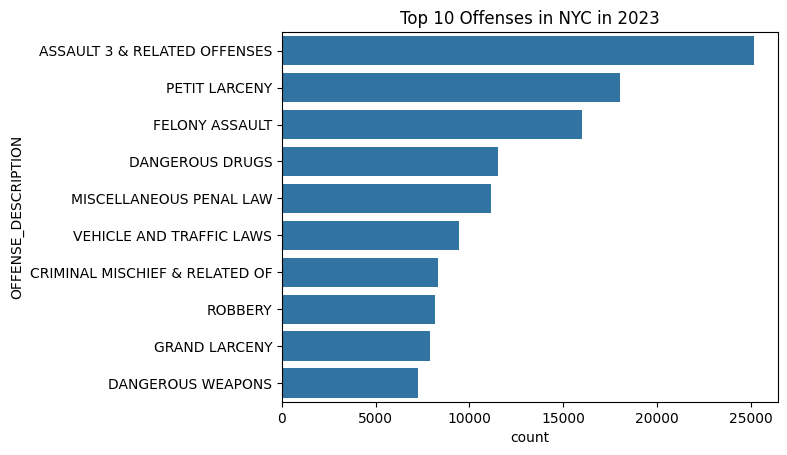

In [22]:
sns.countplot(y="OFFENSE_DESCRIPTION", data=df,
                order=df["OFFENSE_DESCRIPTION"].value_counts().iloc[:10].index)
plt.title("Top 10 Offenses in NYC in 2023")
plt.show()

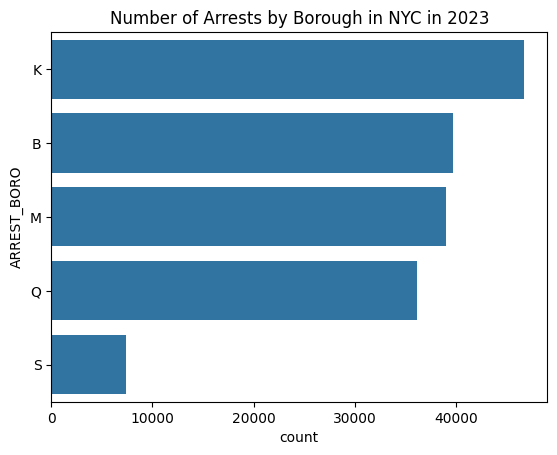

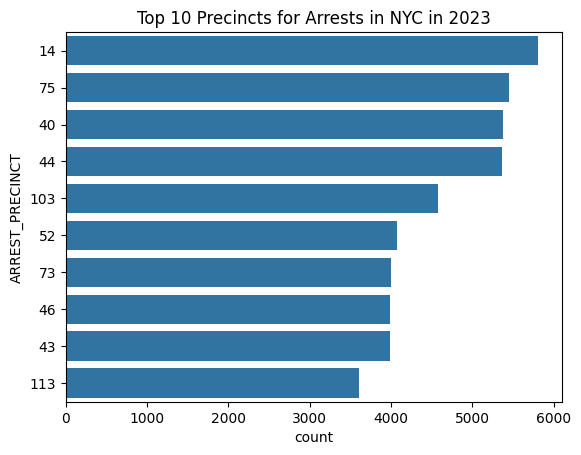

In [28]:
sns.countplot(y="ARREST_BORO", data=df, order=df["ARREST_BORO"].value_counts(15).index)
plt.title("Number of Arrests by Borough in NYC in 2023")
plt.show()

sns.countplot(y="ARREST_PRECINCT", data=df, order=df["ARREST_PRECINCT"].value_counts().index[:10])
plt.title("Top 10 Precincts for Arrests in NYC in 2023")
plt.show()

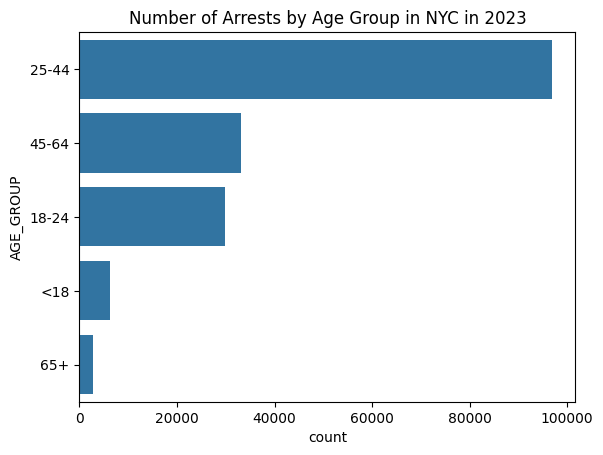

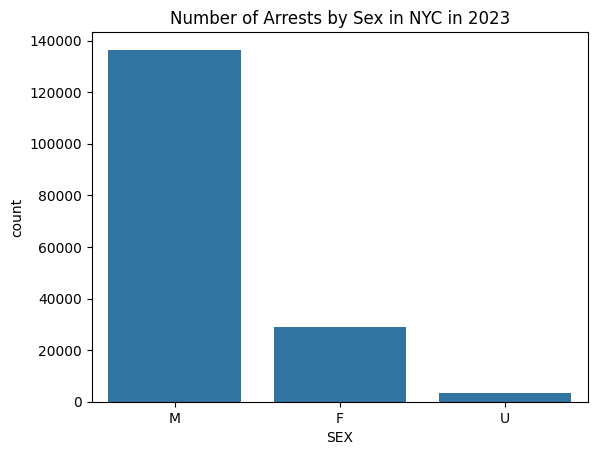

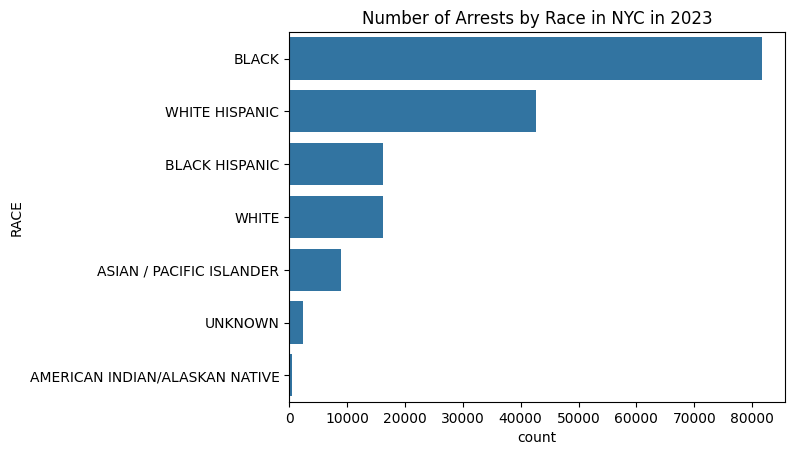

In [32]:
sns.countplot(y="AGE_GROUP", data=df, order=df["AGE_GROUP"].value_counts().index)
plt.title("Number of Arrests by Age Group in NYC in 2023")
plt.show()

sns.countplot(x="SEX", data=df, order=df["SEX"].value_counts().index)
plt.title("Number of Arrests by Sex in NYC in 2023")
plt.show()

sns.countplot(y="RACE", data=df, order=df["RACE"].value_counts().index)
plt.title("Number of Arrests by Race in NYC in 2023")
plt.show()

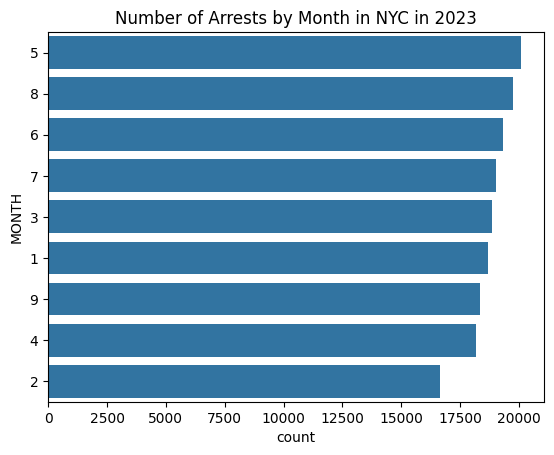

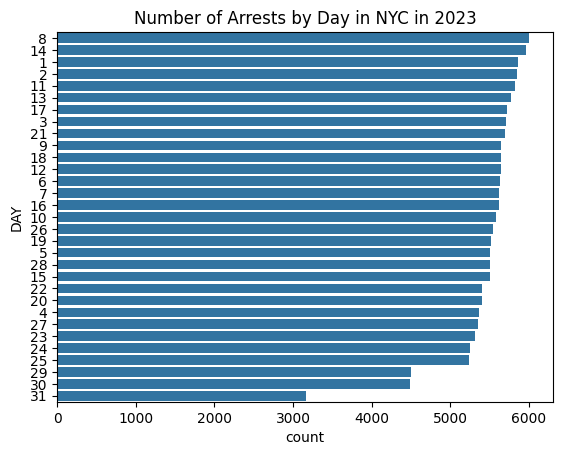

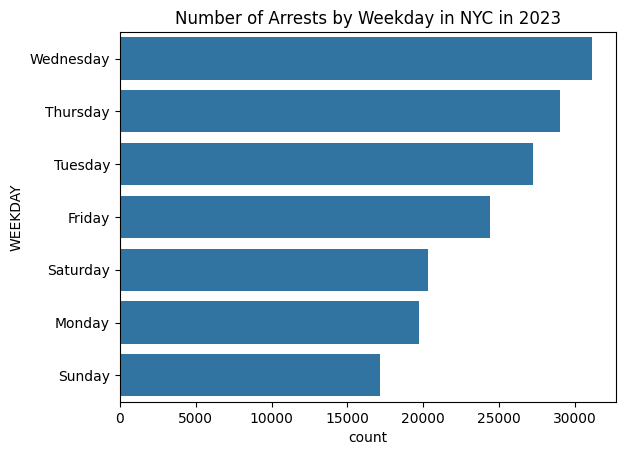

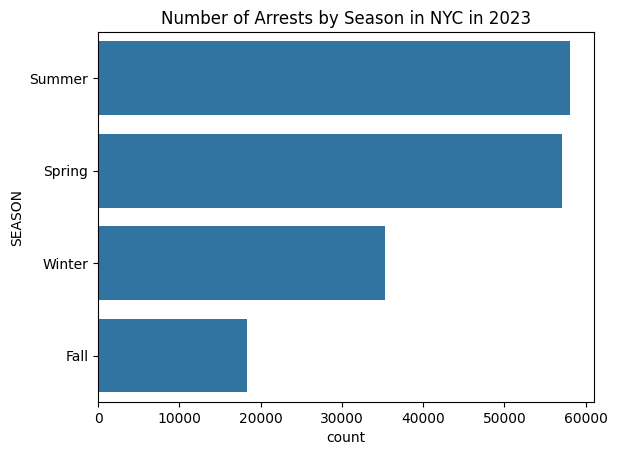

In [34]:
sns.countplot(y="MONTH", data=df, order=df["MONTH"].value_counts().index)
plt.title("Number of Arrests by Month in NYC in 2023")
plt.show()

sns.countplot(y="DAY", data=df, order=df["DAY"].value_counts().index)
plt.title("Number of Arrests by Day in NYC in 2023")
plt.show()

sns.countplot(y="WEEKDAY", data=df, order=df["WEEKDAY"].value_counts().index)
plt.title("Number of Arrests by Weekday in NYC in 2023")
plt.show()

sns.countplot(y="SEASON", data=df, order=df["SEASON"].value_counts().index)
plt.title("Number of Arrests by Season in NYC in 2023")
plt.show()